In [34]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
campaign_info = pd.read_csv("marketing_campaign.csv", delimiter = ';')

In [4]:
# Here we look at the column titles, number of values, and typ of values

campaign_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Note: Income has 34 null values

In [11]:
# Below, we're looking at the different types of categories for features with object type values.

campaign_info["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
campaign_info["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [7]:
campaign_info["Dt_Customer"].value_counts()

2012-08-31    12
2013-02-14    11
2014-05-12    11
2012-09-12    11
2014-05-22    10
              ..
2013-07-20     1
2013-12-22     1
2013-08-27     1
2014-02-08     1
2014-03-28     1
Name: Dt_Customer, Length: 663, dtype: int64

In [8]:
campaign_info.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


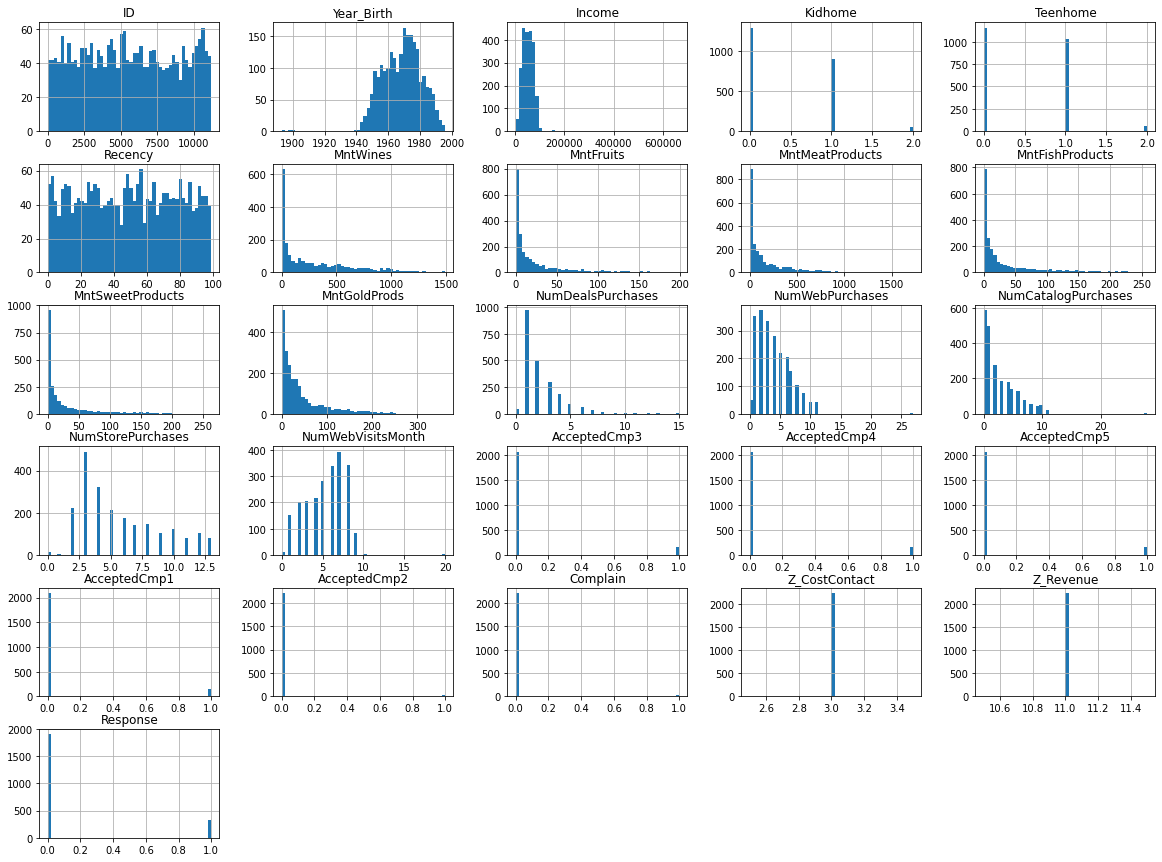

In [12]:
campaign_info.hist(bins=50, figsize=(20,15))
plt.show()

In [31]:
# Creates new category that tells us whether a customer accepted a campaign at any point or not

campaign_info["AcceptedAnyCmp"] = (campaign_info["AcceptedCmp1"] + campaign_info["AcceptedCmp2"] + \
    campaign_info["AcceptedCmp3"] + campaign_info["AcceptedCmp4"] + campaign_info["AcceptedCmp5"]) >= 1

# Turns boolean "True/False" into integers "1/0" so the category can be plotted as a histogram

campaign_info["AcceptedAnyCmp"] = campaign_info["AcceptedAnyCmp"].astype(np.int8)

In [32]:
# Creates a new category that shows the number of campaigns accepted by each customer

campaign_info["AcceptedNumofCmps"] = (campaign_info["AcceptedCmp1"] + campaign_info["AcceptedCmp2"] + \
    campaign_info["AcceptedCmp3"] + campaign_info["AcceptedCmp4"] + campaign_info["AcceptedCmp5"])

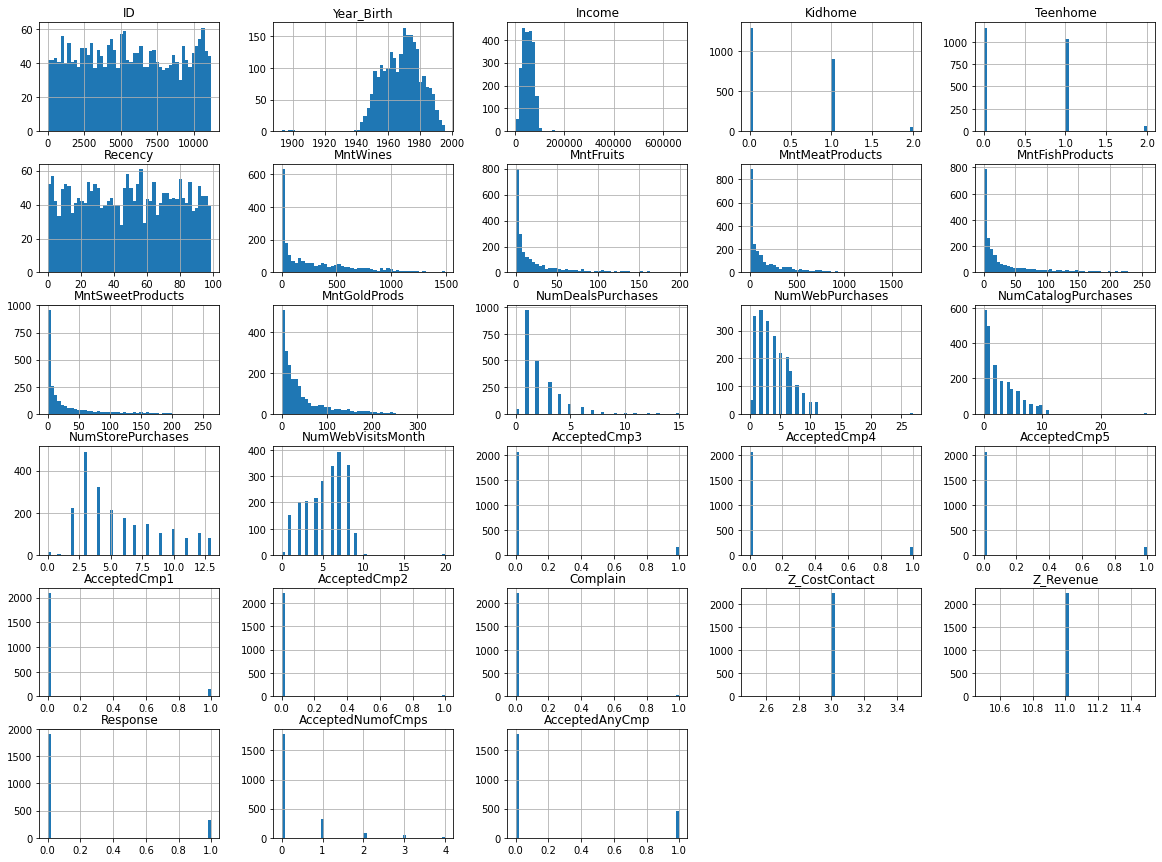

In [33]:
campaign_info.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
# We now create the test and training sets; We stratify these based on "AcceptedAnyCmp" and "Recency"

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(campaign_info, campaign_info["AcceptedAnyCmp"]):
    strat_train_set = campaign_info.loc[train_index]
    strat_test_set = campaign_info.loc[test_index]

In [42]:
# Looking at how well the test set was stratified. We would expect ~80% of test set to be 0 and remainder 1

strat_test_set["AcceptedAnyCmp"].value_counts() / len(strat_test_set)

0    0.792411
1    0.207589
Name: AcceptedAnyCmp, dtype: float64